In [2]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
countrydf = pd.read_csv('country-gdp-timeseries.csv') #COUNTRYDF IS THE FILE WITH GDP
coupdf=pd.read_csv("powell_thyne_coups_final.csv") #COUPDF IS THE FILE WITH COUPS

In [3]:
countrydf.head() #ALL COUNTRIES ARE  PRESENT HERE

,Country,Continent,Year,GDP_per_capita,life_expectancy,Population
0,Afghanistan,Asia,1950,757,26.674,8151455
1,Afghanistan,Asia,1951,767,26.932,8276820
2,Afghanistan,Asia,1952,779,27.448,8407148
3,Afghanistan,Asia,1953,813,27.964,8542906
4,Afghanistan,Asia,1954,815,28.480,8684494


In [4]:
countrydf=countrydf[(countrydf['Country'].isin(coupdf.country.unique()))] #REMOVING ALL COUNTRIES WITHOUT COOPS

In [5]:
len(countrydf.Country.unique()) #ALL COUNTRIES THAT HAVE HAD A COUP

86

In [6]:
coupdf.head() #ALL COUNTRIES THAT HAVE HAD COUPS IN THE COUPDF

,country,ccode,year,month,day,coup,version
0,Cuba,40,1952,3,10,2,V2016.07.20
1,Cuba,40,1957,9,5,1,V2016.07.20
2,Haiti,41,1950,5,10,2,V2016.07.20
3,Haiti,41,1956,12,12,2,V2016.07.20
4,Haiti,41,1957,4,2,2,V2016.07.20


In [7]:
coupdf=coupdf.sort_values(['country','year']) #SORT THE FILES ALPHABETICALLY

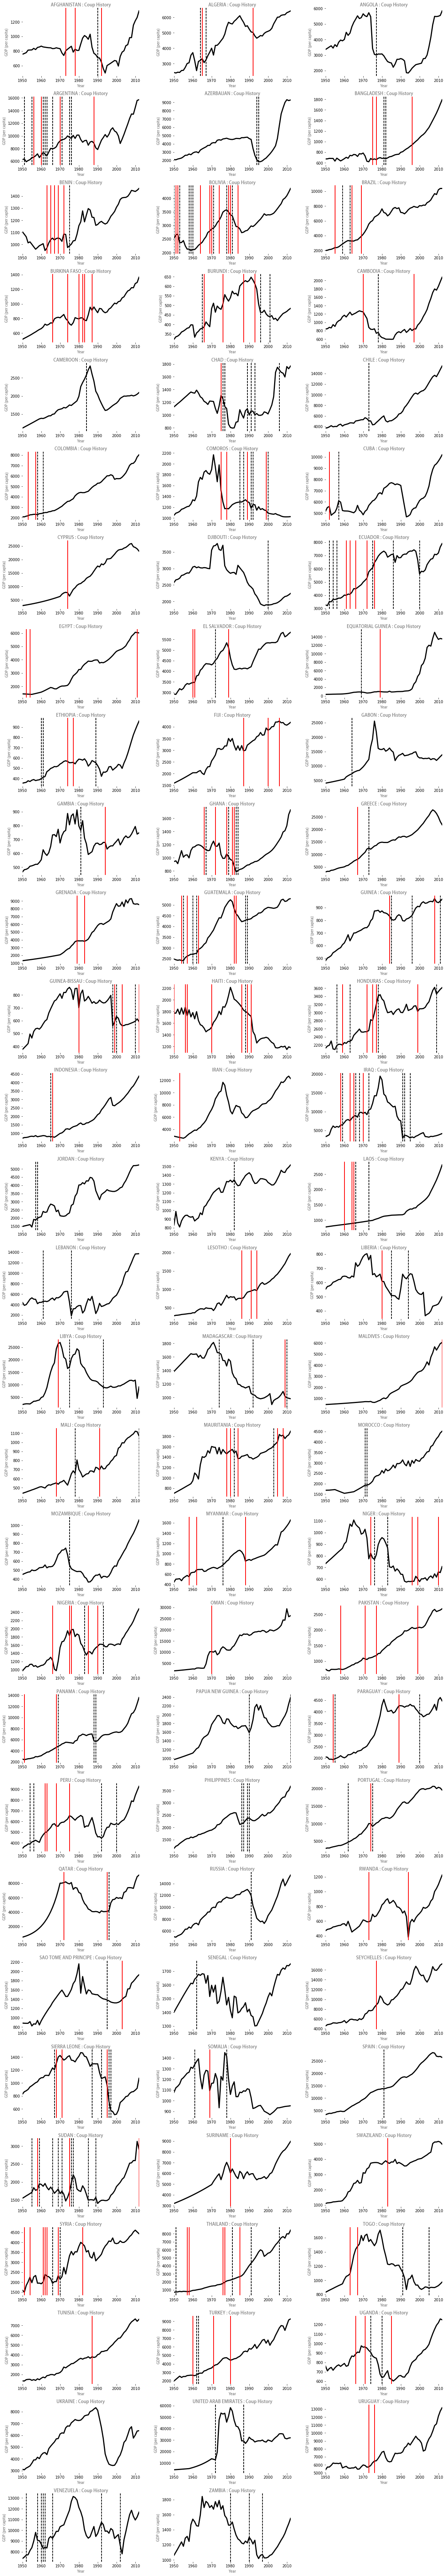

In [17]:

csfont = {'fontname':'Adobe Fan Heiti Std'}
fig=plt.figure(figsize=(20,125))

for m in range(len(countrydf.Country.unique())): 
    name=countrydf.Country.unique()[m]
    country=countrydf[(countrydf['Country'] == name)]
    coupcountry = coupdf[(coupdf['country'] == name)]    
    ax = plt.subplot(29,3,m+1)
    fig.subplots_adjust(wspace = 0.3,hspace=0.3)
    country.plot(x='Year',y='GDP_per_capita',color='Black',linewidth=3,ax=ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    numberofcoups=len(coupcountry.year.unique())
    count=0
    for x in range(numberofcoups):
        if (coupcountry.iloc[count]['coup']==2):
            plt.axvline(coupcountry.year.unique()[count],color='Red',linewidth='2')
        else:
            plt.axvline(coupcountry.year.unique()[count],linestyle='dashed',color='Black',linewidth='2')
        count=count+1
    ax.set_title(coupcountry.country.unique()[0].upper()+" : Coup History",**csfont,color='Grey',fontsize=12)
    ax.set_xlabel("Year",**csfont,color='Grey',fontsize=10)
    ax.set_ylabel("GDP (per capita)",**csfont,color='Grey',fontsize=10)
    ax.tick_params(axis='x', colors='Black')
    ax.tick_params(axis='y', colors='Black')
    ax.legend_.remove()

